In [1]:
from pipeline.configs import ExperimentConfigs
import json 
config = ExperimentConfigs('/home/df630/Multimodal-Bridges/experiments/configs/config_multimodal.yaml')

In [2]:
config.to_dict()['data']

{'modality': 'multi-modal',
 'batch_size': 1024,
 'split_ratios': [0.9, 0.1],
 'transform': None,
 'continuous_features': ['pt', 'eta_rel', 'phi_rel'],
 'discrete_features': 'tokens',
 'target_name': 'AspenOpenJets',
 'target_path': '/home/df630/Multimodal-Bridges/data/aoj/',
 'target_train_files': 'RunG_batch0.h5',
 'target_test_files': 'RunG_batch1.h5',
 'source_name': 'MultiModalNoise',
 'source_path': None,
 'source_train_files': None,
 'source_test_files': None,
 'num_jets': 100000,
 'min_num_particles': 0,
 'max_num_particles': 128,
 'dim_continuous': 3,
 'dim_discrete': 1,
 'dim_context_continuous': 0,
 'dim_context_discrete': 0,
 'vocab_size': 8,
 'vocab_size_context': 0,
 'num_workers': 0,
 'pin_memory': False}

In [3]:
config.to_dict()['encoder']



{'name': 'MultiModalEPiC',
 'num_blocks': 10,
 'dim_hidden_local': 128,
 'dim_hidden_glob': 16,
 'skip_connection': True,
 'dropout': 0.2,
 'data_augmentation': False,
 'dim_emb_time': 16,
 'dim_emb_continuous': 3,
 'dim_emb_discrete': 3,
 'dim_emb_context_continuous': 0,
 'dim_emb_context_discrete': 0,
 'embed_type_time': 'SinusoidalPositionalEncoding',
 'embed_type_continuous': None,
 'embed_type_discrete': 'LookupTable',
 'embed_type_context_continuous': None,
 'embed_type_context_discrete': None}

In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
from datamodules.particle_clouds.utils import JetFeatures
from datamodules.particle_clouds.aoj import AspenOpenJets

aoj = AspenOpenJets(data_dir="/home/df630/Multimodal-Bridges/data/aoj",
                    data_files="RunG_batch0.h5"
                    )

data, metadata = aoj(num_jets=10000, download=False, features={"continuous": ["pt", "phi_rel", "eta_rel", "onehot"], "discrete": 'tokens'},)
jets = JetFeatures(data)


(10000, 150, 8)


/home/df630/Multimodal-Bridges/multimodal_bridges/datamodules/particle_clouds/aoj.py:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  list_discrete_feats.append(torch.tensor(feats[features["discrete"]]))


Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
#--------------------------------------------------------------------------
#                         FastJet release 3.4.2
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPY

In [3]:
data.continuous.shape, data.discrete.shape

(torch.Size([10000, 150, 11]), torch.Size([10000, 150, 1]))

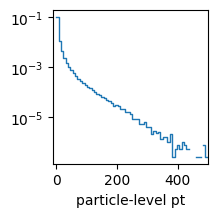

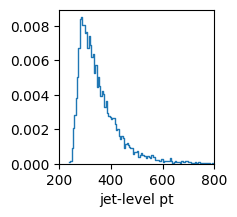

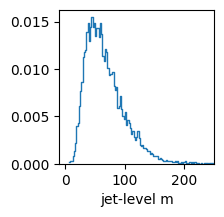

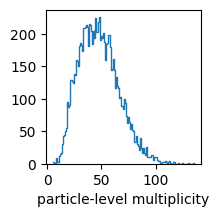

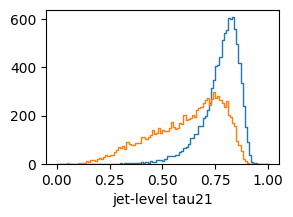

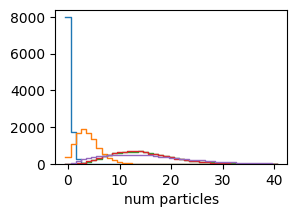

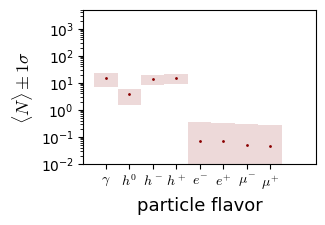

In [3]:
_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.constituents.histplot("pt", ax=ax, fill=False, bins=100, lw=1, log_scale=(False, True), stat="density", xlim=(-10, 500))

_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.histplot("pt", ax=ax, fill=False, bins=200, lw=1, stat="density", xlim=(200, 800))

_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.histplot("m", ax=ax, fill=False, bins=200, lw=1, stat="density", xlim=(-10, 250))

_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.constituents.histplot(
    "multiplicity", ax=ax, lw=1, fill=False, discrete=True,)

_, ax = plt.subplots(1, 1, figsize=(3, 2))
jets.histplot("tau32", ax=ax, lw=1, fill=False, binrange=(0, 1), bins=100)
jets.histplot("tau21", ax=ax, lw=1, fill=False, binrange=(0, 1), bins=100)

_, ax = plt.subplots(1, 1, figsize=(3, 2))

jets.histplot("numLeptons", fill=False, ax=ax, lw=1, binrange=(0, 40), discrete=True)
jets.histplot(
    "numNeutralHadrons", fill=False, ax=ax, lw=1, binrange=(0, 40), discrete=True
)
jets.histplot(
    "numPositiveHadrons", fill=False, ax=ax, lw=1, binrange=(0, 40), discrete=True
)
jets.histplot(
    "numNegativeHadrons", fill=False, ax=ax, lw=1, binrange=(0, 40), discrete=True
)
jets.histplot(
    "numPhotons",
    fill=False,
    xlabel="num particles",
    ax=ax,
    lw=1,
    binrange=(0, 40),
    discrete=True,
)

_, ax = plt.subplots(1, 1, figsize=(3, 2))

jets.plot_flavor_count_per_jet(ax=ax)

## get AOJ metadata

In [ ]:
import numpy as np
import json
import os
from datamodules.particle_clouds.aoj import AspenOpenJets

def extract_aoj_metadata(path, filename):
    """Compute statistics for the given data.
    """

    file_path = os.path.join(path, filename)

    aoj = AspenOpenJets(file_path)
    data = aoj()
    continuous = data.continuous
    mask = data.mask
    mask_bool = mask.squeeze(-1) > 0

    nums = mask.sum(dim=1).squeeze()
    hist, _ = np.histogram(
        nums, bins=np.arange(0, continuous.shape[1] + 2, 1), density=True
    )

    return {
        "source file": filename,
        "num_jets_sample": continuous.shape[0],
        "num_particles_sample": nums.sum().item(),
        "max_num_particles_per_jet": continuous.shape[1],
        "continuous_mean": continuous[mask_bool].mean(0).tolist(),
        "continuous_std": continuous[mask_bool].std(0).tolist(),
        "continuous_min": continuous[mask_bool].min(0).values.tolist(),
        "continuous_max": continuous[mask_bool].max(0).values.tolist(),
        "continuous_features": {"pt": 0, "eta_rel": 1, "phi_rel": 2},
        "tokens": {
            0: {"name": "photon", "color": "gold", "marker": "o", "tex": r"\gamma"},
            1: {"name": "h0", "color": "darkred", "marker": "o", "tex": r"$\rm h^0$",},
            2: {"name": "h-", "color": "darkred", "marker": "v", "tex": r"$\rm h^-$"},
            3: {"name": "h+", "color": "darkred", "marker": "^", "tex": r"$\rm h^+$"},
            4: {"name": "e-", "color": "blue", "marker": "v", "tex": r"e^-"},
            5: {"name": "e+", "color": "blue", "marker": "^", "tex": r"e^+"},
            6: {"name": "mu-", "color": "green", "marker": "v", "tex": r"\mu^-"},
            7: {"name": "mu+", "color": "green", "marker": "^", "tex": r"\mu^+"},
        },
        "categorical_probs": hist.tolist(),
    }

In [ ]:
aoj_dir = "/home/df630/Multimodal-Bridges/data/aoj"
filename = "RunG_batch0.h5"
metadata = extract_aoj_metadata(aoj_dir, filename)

with open(os.path.join(aoj_dir, "metadata.json"), "w") as f:
    json.dump(metadata, f, indent=4)

## Examine AOJ data

In [ ]:
import numpy as np
import json
import matplotlib.pyplot as plt

from datamodules.particle_clouds.aoj import AspenOpenJets
from datamodules.particle_clouds.utils import JetFeatures

aoj = AspenOpenJets(data_dir="/home/df630/Multimodal-Bridges/data/aoj",
                    data_files="RunG_batch0.h5"
                    )

data, metadata = aoj(num_jets=10000, download=False)
jets = JetFeatures(data)


In [ ]:
_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.constituents.histplot("pt", ax=ax, fill=False, bins=100, lw=1, log_scale=(False, True), stat="density", xlim=(-10, 500))

_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.histplot("pt", ax=ax, fill=False, bins=200, lw=1, stat="density", xlim=(200, 800))

_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.histplot("m", ax=ax, fill=False, bins=200, lw=1, stat="density", xlim=(-10, 250))

_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.constituents.histplot(
    "multiplicity", ax=ax, lw=1, fill=False, discrete=True,)

_, ax = plt.subplots(1, 1, figsize=(3, 2))
jets.histplot("tau32", ax=ax, lw=1, fill=False, binrange=(0, 1), bins=100)
jets.histplot("tau21", ax=ax, lw=1, fill=False, binrange=(0, 1), bins=100)

_, ax = plt.subplots(1, 1, figsize=(3, 2))

jets.histplot("numLeptons", fill=False, ax=ax, lw=1, binrange=(0, 40), discrete=True)
jets.histplot(
    "numNeutralHadrons", fill=False, ax=ax, lw=1, binrange=(0, 40), discrete=True
)
jets.histplot(
    "numPositiveHadrons", fill=False, ax=ax, lw=1, binrange=(0, 40), discrete=True
)
jets.histplot(
    "numNegativeHadrons", fill=False, ax=ax, lw=1, binrange=(0, 40), discrete=True
)
jets.histplot(
    "numPhotons",
    fill=False,
    xlabel="num particles",
    ax=ax,
    lw=1,
    binrange=(0, 40),
    discrete=True,
)

_, ax = plt.subplots(1, 1, figsize=(3, 2))

jets.plot_flavor_count_per_jet(ax=ax)


## preprocessing:

In [ ]:
import numpy as np
import json
import matplotlib.pyplot as plt

from datamodules.particle_clouds.aoj import AspenOpenJets
from datamodules.particle_clouds.utils import JetFeatures


aoj = AspenOpenJets(data_dir="/home/df630/Multimodal-Bridges/data/aoj",
                    data_files="RunG_batch0.h5"
                    )

data, metadata = aoj(num_jets=10000, download=False, transform='standardize')
jets = JetFeatures(data)


In [ ]:
_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.constituents.histplot("pt", ax=ax, fill=False, bins=100, lw=1, log_scale=(False, True), stat="density")

_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.histplot("pt", ax=ax, fill=False, bins=200, lw=1, stat="density")

_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.histplot("m", ax=ax, fill=False, bins=200, lw=1, stat="density")

_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.constituents.histplot(
    "multiplicity", ax=ax, lw=1, fill=False, discrete=True,)

_, ax = plt.subplots(1, 1, figsize=(3, 2))
jets.histplot("tau32", ax=ax, lw=1, fill=False, binrange=(0, 1), bins=100)
jets.histplot("tau21", ax=ax, lw=1, fill=False, binrange=(0, 1), bins=100)

_, ax = plt.subplots(1, 1, figsize=(3, 2))

jets.histplot("numLeptons", fill=False, ax=ax, lw=1, binrange=(0, 40), discrete=True)
jets.histplot(
    "numNeutralHadrons", fill=False, ax=ax, lw=1, binrange=(0, 40), discrete=True
)
jets.histplot(
    "numPositiveHadrons", fill=False, ax=ax, lw=1, binrange=(0, 40), discrete=True
)
jets.histplot(
    "numNegativeHadrons", fill=False, ax=ax, lw=1, binrange=(0, 40), discrete=True
)
jets.histplot(
    "numPhotons",
    fill=False,
    xlabel="num particles",
    ax=ax,
    lw=1,
    binrange=(0, 40),
    discrete=True,
)

_, ax = plt.subplots(1, 1, figsize=(3, 2))

jets.plot_flavor_count_per_jet(ax=ax)


# Examine generated jets

In [ ]:
import numpy as np
import json
import torch
import matplotlib.pyplot as plt

from tensorclass import TensorMultiModal
from datamodules.particle_clouds.utils import JetFeatures


dir_path = '/home/df630/Multimodal-Bridges/experiments/results/comet/multimodal-jets/07a2c03c6317431cae6fd447087962b5'

with open(dir_path + '/metadata.json', 'r') as f:
    metadata = json.load(f)

src_path = dir_path + '/data/source_sample.h5'
test_path = dir_path + '/data/test_sample.h5'
gen_path = dir_path + '/data/generated_sample.h5'

gen = TensorMultiModal.load_from(gen_path)
src = TensorMultiModal.load_from(src_path)
test = TensorMultiModal.load_from(test_path)



In [ ]:
# mean = torch.tensor(metadata['target']['mean'])
# std = torch.tensor(metadata['target']['std'])

# gen.continuous = gen.continuous * std +  mean 
# test.continuous = test.continuous * std + mean

# gen.continuous *= gen.mask
# test.continuous *= test.mask

# gen.apply_mask()
# test.apply_mask()

In [ ]:
src_jets = JetFeatures(src)
gen_jets = JetFeatures(gen)
test_jets = JetFeatures(test)

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(2, 2))
test_jets.constituents.histplot("pt", ax=ax, fill=False, bins=100, lw=1, color = 'r', log_scale=(False, True), stat="density", binrange=(-5, 800))
gen_jets.constituents.histplot("pt", ax=ax, fill=False, bins=100, lw=1, color = 'k', log_scale=(False, True), stat="density", binrange=(-5, 800))
src_jets.constituents.histplot("pt", ax=ax, fill=False, bins=100, lw=1, color = 'b', log_scale=(False, True), stat="density", binrange=(-5, 800))


_, ax = plt.subplots(1, 1, figsize=(2, 2))
test_jets.constituents.histplot("eta_rel", ax=ax, fill=False, bins=100, color = 'r', lw=1, stat="density")
gen_jets.constituents.histplot("eta_rel", ax=ax, fill=False, bins=100, color = 'k', lw=1,  stat="density")
src_jets.constituents.histplot("eta_rel", ax=ax, fill=False, bins=100, color = 'b', lw=1, stat="density")

_, ax = plt.subplots(1, 1, figsize=(2, 2))
test_jets.constituents.histplot("phi_rel", ax=ax, fill=False, bins=100, color = 'r', lw=1,  stat="density")
gen_jets.constituents.histplot("phi_rel", ax=ax, fill=False, bins=100, color = 'k', lw=1,  stat="density")
src_jets.constituents.histplot("phi_rel", ax=ax, fill=False, bins=100, color = 'b', lw=1, stat="density")

_, ax = plt.subplots(1, 1, figsize=(2, 2))
test_jets.histplot("pt", ax=ax, fill=False, bins=20, color = 'r', lw=1, stat="density", binrange=(-10,800))
gen_jets.histplot("pt", ax=ax, fill=False, bins=20, color = 'k', lw=1, stat="density", binrange=(-10,800))
src_jets.histplot("pt", ax=ax, fill=False, bins=20, color = 'b', lw=1, stat="density", binrange=(-10,800))

_, ax = plt.subplots(1, 1, figsize=(2, 2))
test_jets.histplot("m", ax=ax, fill=False, bins=20, color = 'r', lw=1, stat="density", binrange=(-10,400))
gen_jets.histplot("m", ax=ax, fill=False, bins=20, color = 'k', lw=1, stat="density", binrange=(-10,400))
src_jets.histplot("m", ax=ax, fill=False, bins=20, color = 'b', lw=1, stat="density", binrange=(-10,400))


_, ax = plt.subplots(1, 1, figsize=(2, 2))
test_jets.constituents.histplot("multiplicity", ax=ax, lw=1, color = 'r', fill=False, discrete=True, bins=20)
gen_jets.constituents.histplot("multiplicity", ax=ax, lw=1, color = 'k', fill=False, discrete=True, bins=20)
src_jets.constituents.histplot("multiplicity", ax=ax, lw=1, color = 'b', fill=False, discrete=True, bins=20 )

_, ax = plt.subplots(1, 1, figsize=(3, 2))
test_jets.histplot("tau32", ax=ax, lw=1, fill=False, color = 'r', binrange=(0, 1), bins=20)
gen_jets.histplot("tau32", ax=ax, lw=1, fill=False, color = 'k', binrange=(0, 1), bins=20)
src_jets.histplot("tau32", ax=ax, lw=1, fill=False, color = 'b', binrange=(0, 1), bins=20)


In [ ]:
_, ax = plt.subplots(1, 1, figsize=(3, 2))

test_jets.histplot("numLeptons", fill=False, ax=ax, lw=1,  color = 'r', discrete=True, binrange=(0, 40),stat="density", )
gen_jets.histplot("numLeptons", fill=False, ax=ax, lw=1,  color = 'k', discrete=True, binrange=(0, 40),stat="density", )
src_jets.histplot("numLeptons", fill=False, ax=ax, lw=1,  color = 'b', discrete=True, binrange=(0, 40),stat="density", )


In [ ]:
_, ax = plt.subplots(1, 1, figsize=(3, 2))

src_jets.histplot("numHadrons", fill=False, ax=ax, lw=1,  color = 'b', discrete=True, binrange=(0, 100), stat="density")
test_jets.histplot("numHadrons", fill=False, ax=ax, lw=1,  color = 'r', discrete=True, binrange=(0, 100), stat="density", )
gen_jets.histplot("numHadrons", fill=False, ax=ax, lw=1,  color = 'k', discrete=True, binrange=(0, 100), stat="density", )


In [ ]:
_, ax = plt.subplots(1, 1, figsize=(3, 2))

src_jets.histplot("numNeutrals", fill=False, ax=ax, lw=1,  color = 'b', discrete=True, binrange=(0, 60), stat="density", )
test_jets.histplot("numNeutrals", fill=False, ax=ax, lw=1,  color = 'r', discrete=True, binrange=(0, 60), stat="density", )
gen_jets.histplot("numNeutrals", fill=False, ax=ax, lw=1,  color = 'k', discrete=True, binrange=(0, 60), stat="density", )


In [ ]:
_, ax = plt.subplots(1, 1, figsize=(3, 2))

test_jets.histplot("numCharged", fill=False, ax=ax, lw=1,  color = 'r', discrete=True, binrange=(0, 80), stat="density", )
gen_jets.histplot("numCharged", fill=False, ax=ax, lw=1,  color = 'k', discrete=True, binrange=(0, 80), stat="density", )
src_jets.histplot("numCharged", fill=False, ax=ax, lw=1,  color = 'b', discrete=True, binrange=(0,80), stat="density", )


In [ ]:
_, ax = plt.subplots(1, 1, figsize=(3, 2))

src_jets.histplot("numPhotons", fill=False, ax=ax, lw=1,  color = 'b', discrete=True, binrange=(0,80), stat="density", )
test_jets.histplot("numPhotons", fill=False, ax=ax, lw=1,  color = 'r', discrete=True, binrange=(0, 80), stat="density", )
gen_jets.histplot("numPhotons", fill=False, ax=ax, lw=1,  color = 'k', discrete=True, binrange=(0, 80), stat="density", )
